<a href="https://colab.research.google.com/github/Smagali/Tps/blob/main/PAMI_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LA LIBERTAD DE ELEGIR**

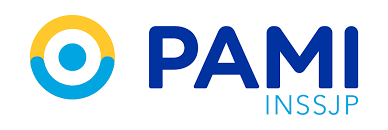

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
from patsy import dmatrices
from charset_normalizer import detect
from google.colab import drive

drive.mount('/content/drive')

filepath1= "/content/drive/MyDrive/2024/1sem_2022.xls.csv"
filepath2 = "/content/drive/MyDrive/2024/1sem_2024.xls.csv"



Mounted at /content/drive


In [2]:


# Leer el archivo en modo binario para detectar la codificación
with open(filepath1, 'rb') as f:
    result = detect(f.read())
    print(result['encoding'])

with open(filepath2, 'rb') as g:
    result2 = detect(g.read())
    print(result2['encoding'])



windows-1250
windows-1250


In [3]:
data = pd.read_csv(filepath1, encoding=result['encoding'])


data2 = pd.read_csv(filepath2, encoding=result2['encoding'])


data2.columns = data.columns  # Asegurar de que las columnas coincidan
data2 = data2[1:]  # Elimina la primera fila de data2

# Appendear los dataframes
combined_data = pd.concat([data, data2], ignore_index=True)


num_Data = len(data)
num_Data2 = len(data2)
num_total = len(combined_data)
print(f"Número de data: {num_Data}")
print(f"Número de data2: {num_Data2}")
print(f"Número de data total: {num_total}")
combined_data.head()

Número de data: 7889
Número de data2: 12989
Número de data total: 20878


,N_ORDEN,FECHA_EMISION,NRO_BENEFICIO,APELLIDO_NOMBRE,PRACTICA,FECHA_TURNO,US_ACEPTO,FECHA_ACEPTO,TRANSMITIDA,F_TRANSMISION,USUARIO_TRANSMITIO,VALIDADA,F_VALIDACION,USUARIO_VALIDO
0,3322806124351,24/11/2022,15024832630600,ZELADA HILDA OTILIA,429001 - PRIMERA CONSULTA OFTALMOLOGICA EN CON...,01/02/2023 - 11:30 - P,UP20118242638,29/11/2022,S,22/02/2023,UP20118242638,S,02/02/2023 11:58:31,UP20118242638
1,3322812657362,30/11/2022,15077414320700,CARRIZO JUAN CARLOS,429002 - CONSULTA DE SEGUIMIENTO OFTALMOLOGICO...,01/02/2023 - 11:45 - P,UP20118242638,30/11/2022,S,22/02/2023,UP20118242638,S,02/02/2023 09:40:58,UP20118242638
2,3323851941702,07/01/2023,15054956450801,CAMPOS DOMINGA LEONOR,429002 - CONSULTA DE SEGUIMIENTO OFTALMOLOGICO...,01/03/2023 - 08:50 - P,UP20118242638,01/03/2023,S,16/03/2023,UP20118242638,S,01/03/2023 08:55:15,UP20118242638
3,3323859797530,14/01/2023,15053178840200,CORONEL MODESTO MACEDONIO,429001 - PRIMERA CONSULTA OFTALMOLOGICA EN CON...,01/03/2023 - 09:00 - P,UP20118242638,16/01/2023,S,16/03/2023,UP20118242638,S,01/03/2023 13:51:20,UP20118242638
4,3322835539119,21/12/2022,15064095600200,ROJAS SALDIAS SUSANA,429001 - PRIMERA CONSULTA OFTALMOLOGICA EN CON...,01/03/2023 - 09:00 - P,UP20118242638,13/01/2023,S,16/03/2023,UP20118242638,S,01/03/2023 13:48:40,UP20118242638


In [45]:
# Aseguramos que la columna 'FECHA_TURNO' sea de tipo string
combined_data['FECHA_TURNO'] = combined_data['FECHA_TURNO'].astype(str)

# Cortamos la cadena para obtener solo la parte relevante
combined_data['FECHA_TURNO'] = combined_data['FECHA_TURNO'].str.slice(0, 10)

# Convertimos la columna de fecha a formato datetime
combined_data['FECHA_TURNO'] = pd.to_datetime(combined_data['FECHA_TURNO'], format='%Y-%m-%d', errors='coerce')

# Filtrar registros donde PRACTICA sea 429001 y la fecha esté entre el 01-09-2022 y el 31-03-2023
fecha_inicio1 = pd.to_datetime('2022-09-01')
fecha_fin1 = pd.to_datetime('2023-03-31')

filtro1 = (
    combined_data['PRACTICA'].str.contains('429001', na=False) &
    (combined_data['FECHA_TURNO'] >= fecha_inicio1) &
    (combined_data['FECHA_TURNO'] <= fecha_fin1)
)

primera_consulta1 = combined_data[filtro1]

# Filtrar registros donde PRACTICA sea 429001 y la fecha esté entre el 01-01-2024 y el 30-06-2024
fecha_inicio2 = pd.to_datetime('2024-01-01')
fecha_fin2 = pd.to_datetime('2024-06-30')

filtro2 = (
    combined_data['PRACTICA'].str.contains('429001', na=False) &
    (combined_data['FECHA_TURNO'] >= fecha_inicio2) &
    (combined_data['FECHA_TURNO'] <= fecha_fin2)
)

primera_consulta2 = combined_data[filtro2]

# Mostrar los resultados
primera_consulta1.head()
primera_consulta2.head()

,N_ORDEN,FECHA_EMISION,NRO_BENEFICIO,APELLIDO_NOMBRE,PRACTICA,FECHA_TURNO,US_ACEPTO,FECHA_ACEPTO,TRANSMITIDA,F_TRANSMISION,USUARIO_TRANSMITIO,VALIDADA,F_VALIDACION,USUARIO_VALIDO
7891,3323417127502,20/12/2023,15064662510300,SILVA MARTA AZUCENA DEL ROSARIO,429001 - PRIMERA CONSULTA OFTALMOLOGICA EN CON...,2024-02-01,UP20118242638,01/02/2024,S,06/03/2024,UP20118242638,S,01/02/2024 09:10:00,UP20118242638
7898,3323388318091,05/12/2023,15075602380300,ACOSTA PABLA,429001 - PRIMERA CONSULTA OFTALMOLOGICA EN CON...,2024-02-01,UP20118242638,01/02/2024,S,06/03/2024,UP20118242638,S,01/02/2024 11:00:20,UP20118242638
7899,3323398160772,11/12/2023,15045541480300,CASTRO MACHADO CARLOS,429001 - PRIMERA CONSULTA OFTALMOLOGICA EN CON...,2024-02-01,UP20118242638,11/12/2023,S,06/03/2024,UP20118242638,S,01/02/2024 11:11:07,UP20118242638
7904,3323369195741,26/11/2023,15013165650100,SANTOS MARIA SIMEONA,429001 - PRIMERA CONSULTA OFTALMOLOGICA EN CON...,2024-02-01,UP20118242638,01/02/2024,S,06/03/2024,UP20118242638,S,01/02/2024 10:59:44,UP20118242638
7906,3323400508936,12/12/2023,15052659110100,DOMINGUEZ RODRIGUEZ JULIA,429001 - PRIMERA CONSULTA OFTALMOLOGICA EN CON...,2024-02-01,UP20118242638,01/02/2024,S,06/03/2024,UP20118242638,S,01/02/2024 11:03:07,UP20118242638


Conteos totales de "primera vez" tanto en primer semestre del programa como primer semestre 2024

In [7]:
#Conteo total de primera vez#

conteo_Primeravez1 = primera_consulta1['PRACTICA'].count()
conteo_Primeravez2 = primera_consulta2['PRACTICA'].count()

print(f"Número de consultas de primera vez en primer semetre 2022: {conteo_Primeravez1}")
print(f"Número de consultas de primera vez en primer semestre 2024: {conteo_Primeravez2}")



Número de consultas de primera vez en primer semetre 2022: 1771
Número de consultas de primera vez en primer semestre 2024: 1720


# **Conteo de primeras consultas por fecha con su respectivo gráfico**

---
Primer semestre del programa

FECHA_TURNO
2022-09-01     1
2022-09-02    12
2022-09-05    12
2022-09-06    12
2022-09-07    11
              ..
2023-03-27    29
2023-03-28    25
2023-03-29    14
2023-03-30     6
2023-03-31    19
Name: count, Length: 139, dtype: int64


<ipython-input-46-d96efb108fc4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_fecha.index, y=conteo_por_fecha.values, palette='Set2')


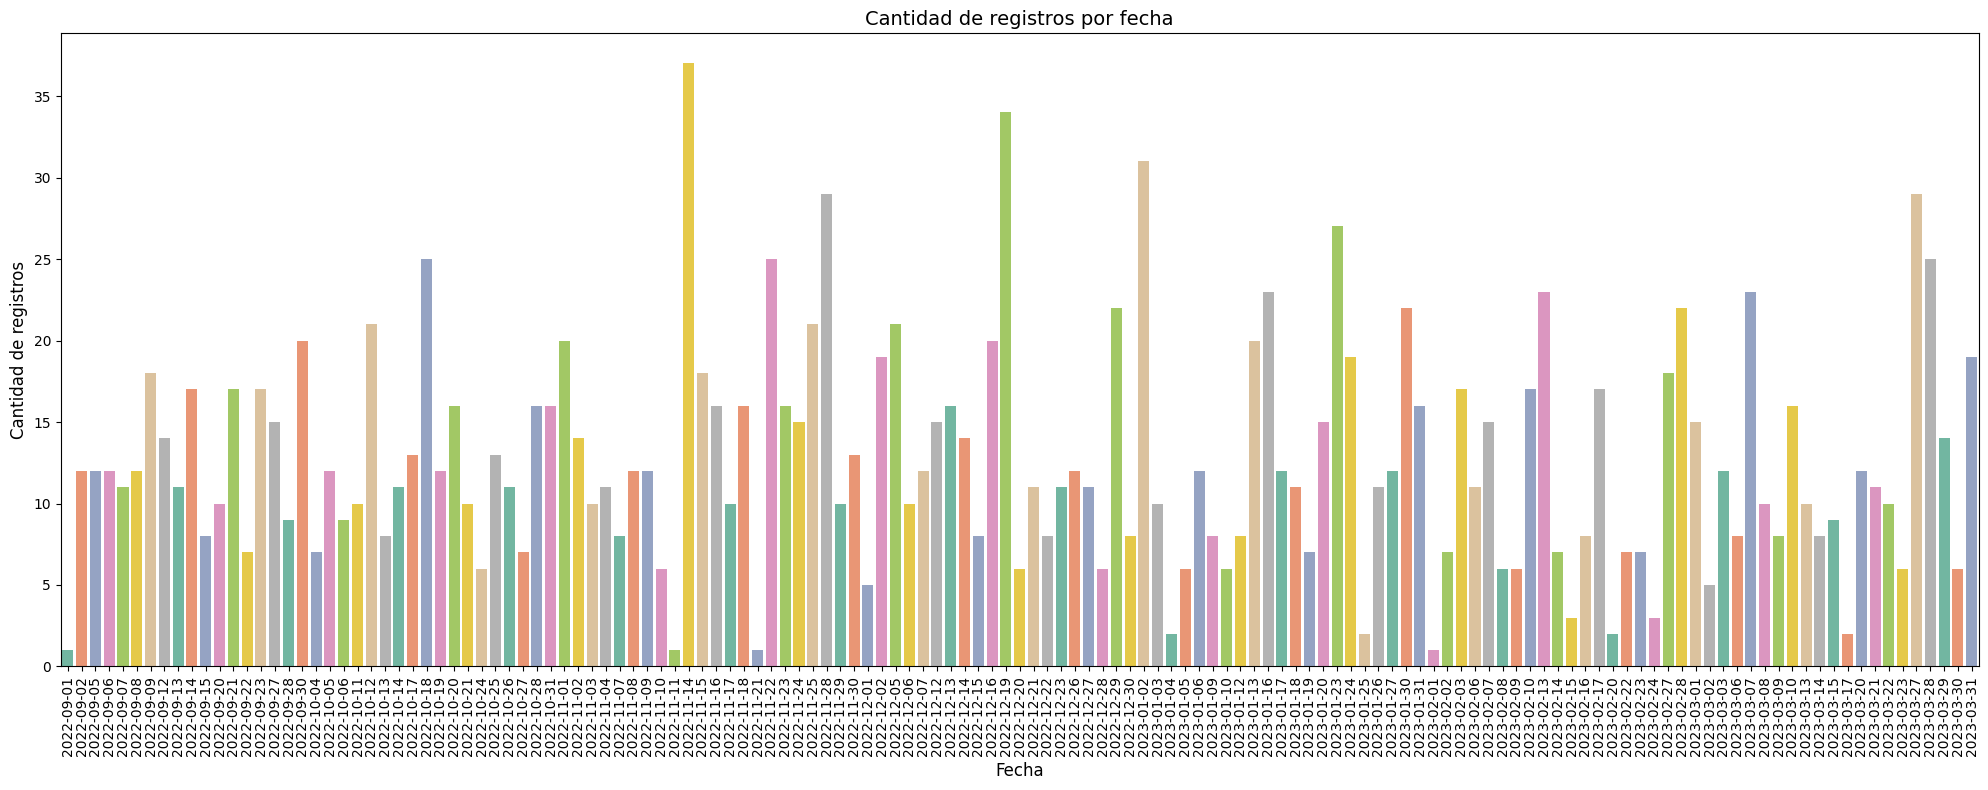

In [46]:
# Contamos los registros por fecha
conteo_por_fecha = primera_consulta1['FECHA_TURNO'].value_counts().sort_index()
print(conteo_por_fecha)

# Crear el gráfico
plt.figure(figsize=(20, 8))
sns.barplot(x=conteo_por_fecha.index, y=conteo_por_fecha.values, palette='Set2')

# Añadir títulos y etiquetas
plt.title('Cantidad de registros por fecha', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de registros', fontsize=12)
plt.xticks(rotation=90)  # Rotar las etiquetas de las fechas para mejor visibilidad

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

# **Conteo de primeras consultas por fecha con su respectivo gráfico**

---
Primer semestre 2024

FECHA_TURNO
2024-01-02     6
2024-01-04     9
2024-01-05    20
2024-01-08     6
2024-01-09    15
              ..
2024-06-18     8
2024-06-24    22
2024-06-25     9
2024-06-27    12
2024-06-28    13
Name: count, Length: 106, dtype: int64


<ipython-input-6-b31757f901d2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_fecha2.index, y=conteo_por_fecha2.values, palette='pastel')


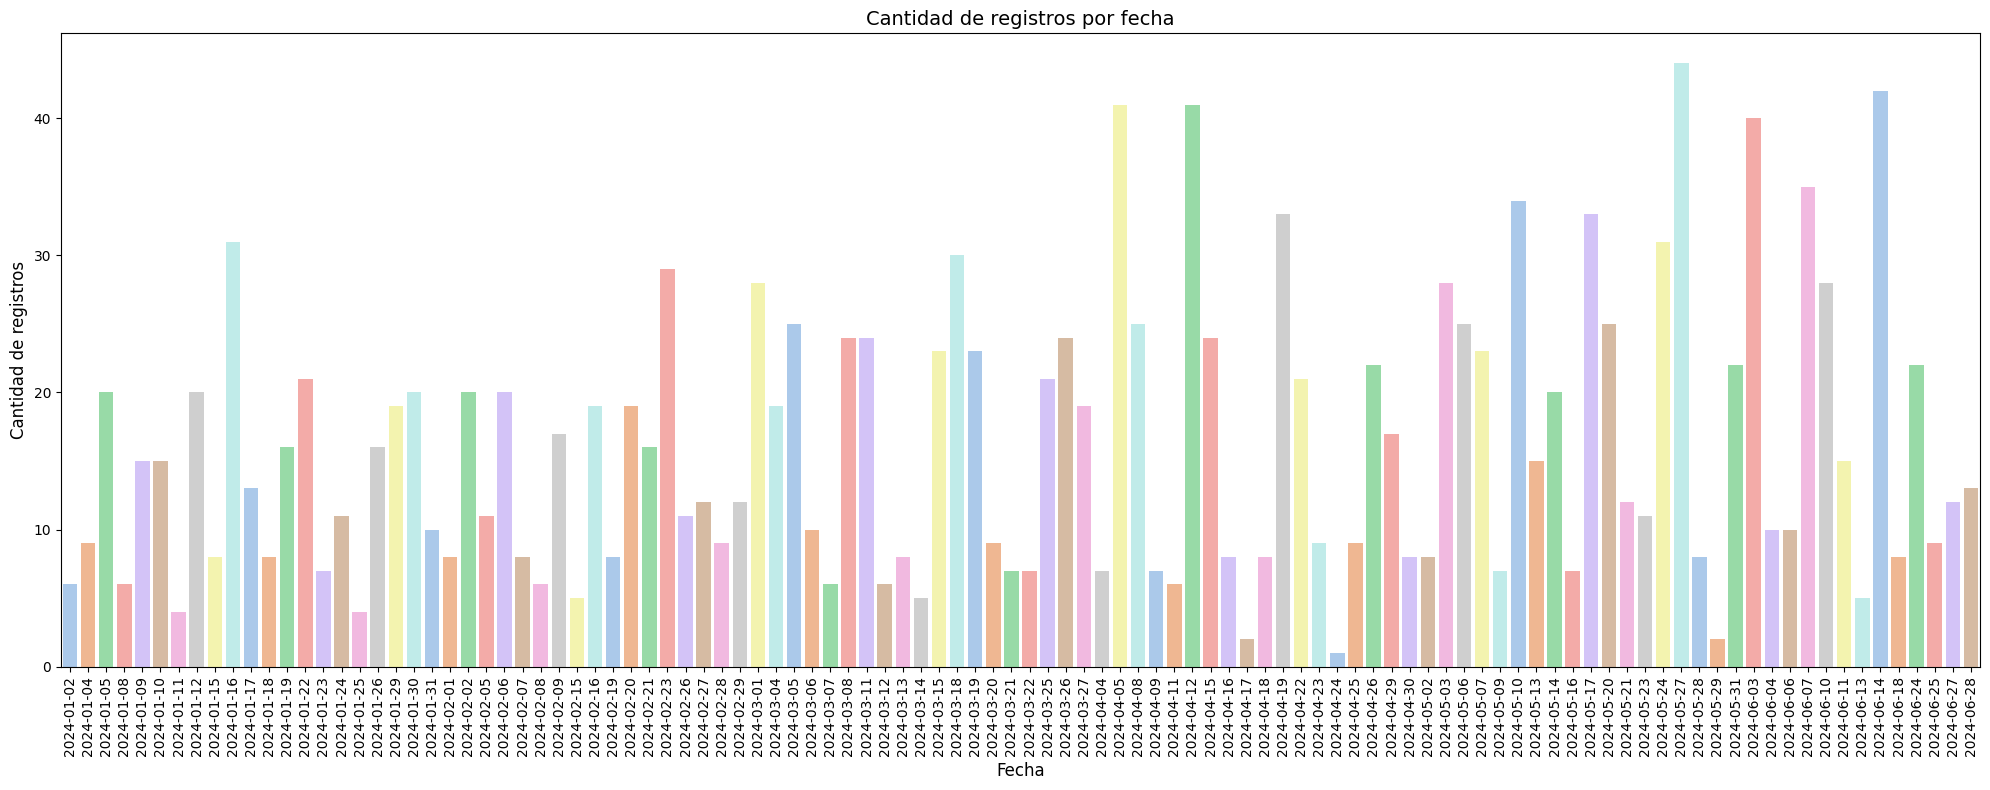

In [6]:
# Contamos los registros por fecha
conteo_por_fecha2 = primera_consulta2['FECHA_TURNO'].value_counts().sort_index()
print(conteo_por_fecha2)

# Crear el gráfico
plt.figure(figsize=(20, 8))
sns.barplot(x=conteo_por_fecha2.index, y=conteo_por_fecha2.values, palette='pastel')

# Añadir títulos y etiquetas
plt.title('Cantidad de registros por fecha', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de registros', fontsize=12)
plt.xticks(rotation=90)  # Rotar las etiquetas de las fechas para mejor visibilidad

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

Conteo de consultas de guardia segun períodos estudiados

In [8]:
# Filtrar registros donde PRACTICA sea 429003 y la fecha esté entre el 01-09-2022 y el 31-03-2023
fecha_inicio = '01/09/2022'
fecha_fin = '31/03/2023'
fecha_inicio2 = '01/01/2024'
fecha_fin2 = '30/06/2024'

# Aplicar el filtro
filtro2 = (combined_data['PRACTICA'].str.contains('429003')) & (combined_data['FECHA_TURNO'] >= fecha_inicio) & (combined_data['FECHA_TURNO'] <= fecha_fin)
consulta_guardia1 = combined_data[filtro2]
filtro3= (combined_data['PRACTICA'].str.contains('429003')) & (combined_data['FECHA_TURNO'] >= fecha_inicio2) & (combined_data['FECHA_TURNO'] <= fecha_fin2)
consulta_guardia2 = combined_data[filtro3]

# Ver los resultados
#consulta_guardia1.head()#
conteo_columna = consulta_guardia1['PRACTICA'].count()
conteo_columna2 = consulta_guardia2['PRACTICA'].count()

print(f"Cantidad de guardias de Primer Semestre 2023: {conteo_columna}")
print(f"Cantidad de guardias de Primer Semestre 2024: {conteo_columna2}")


Cantidad de guardias de Primer Semestre 2023: 275
Cantidad de guardias de Primer Semestre 2024: 105


# **Distribución de "Guardias" graficadas según semestre**

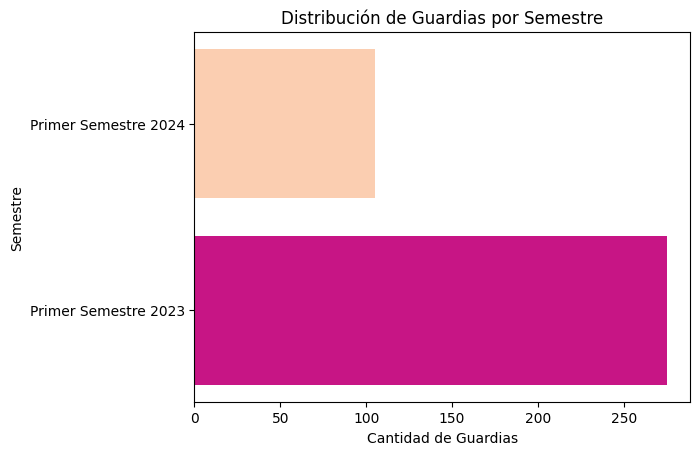

In [9]:
etiquetas = ['Primer Semestre 2023', 'Primer Semestre 2024']
conteos = [conteo_columna, conteo_columna2]  # Conteos de guardias

# Crear el gráfico de barras horizontales
plt.barh(etiquetas, conteos, color=['#c71585', '#fbceb1'])

# Agregar título y etiquetas
plt.title('Distribución de Guardias por Semestre')
plt.xlabel('Cantidad de Guardias')
plt.ylabel('Semestre')

# Mostrar el gráfico
plt.show()

# **Representación gráfica de "Guardias" dentro de conteo de Prácticas totales según primer período analizado**

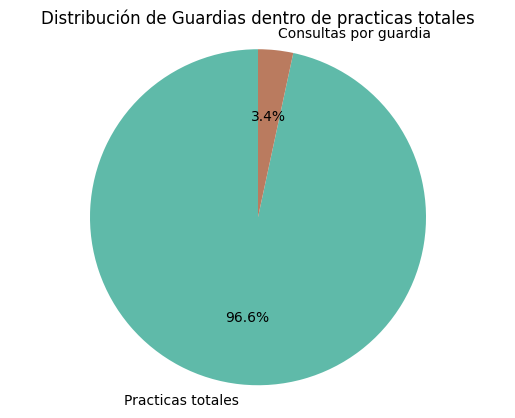

In [10]:
conteo_por_practica1 = len(data['PRACTICA'])

Guardias_filtro1 = (data['PRACTICA'].str.contains('429003'))
Guardias_filtro1 = data[Guardias_filtro1]
Conteo_guardias1 = len(Guardias_filtro1)

etiquetas = ['Practicas totales', 'Consultas por guardia']
conteos = [conteo_por_practica1, Conteo_guardias1]  # Conteos de guardias

# Crear el gráfico de pastel
plt.pie(conteos, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#5fbaa9', '#ba7b5f'])

# Ajustar el aspecto para que sea un círculo perfecto
plt.axis('equal')

# Agregar título
plt.title('Distribución de Guardias dentro de practicas totales')

# Mostrar el gráfico
plt.show()


# **Representación gráfica de "Guardias" dentro de conteo de Prácticas totales según segundo período analizado**

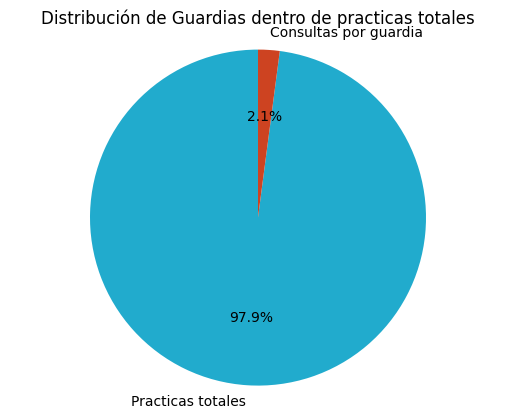

In [12]:
conteo_por_practica2 = len(data2['PRACTICA'])

Guardias_filtro2 = (data['PRACTICA'].str.contains('429003'))
Guardias_filtro2 = data[Guardias_filtro2]
Conteo_guardias2 = len(Guardias_filtro2)

etiquetas = ['Practicas totales', 'Consultas por guardia']
conteos = [conteo_por_practica2, Conteo_guardias2]  # Conteos de guardias

# Crear el gráfico de pastel
plt.pie(conteos, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#21abcd', '#cd4321'])

# Ajustar el aspecto para que sea un círculo perfecto
plt.axis('equal')

# Agregar título
plt.title('Distribución de Guardias dentro de practicas totales')

# Mostrar el gráfico
plt.show()

Cantidad de prácticas quirúrgicas totales por período

In [47]:
# Filtrar registros donde PRACTICA sea 500038 y 500039 y la fecha esté entre el 01-09-2022 y el 31-03-2023
fecha_inicio = '01/09/2022'
fecha_fin = '31/03/2023'

# Aplicar el filtro
cx_filtro1 = (combined_data['PRACTICA'].str.contains('500038|500039')) & (combined_data['FECHA_TURNO'] >= fecha_inicio) & (combined_data['FECHA_TURNO'] <= fecha_fin)
cx1 = combined_data[cx_filtro1]

# Filtrar registros donde PRACTICA sea 500038 y 500039 y la fecha esté entre el 01-09-2022 y el 31-03-2023
fecha_inicio2 = '01/01/2024'
fecha_fin2 = '30/06/2024'

# Aplicar el filtro
cx_filtro2 = (combined_data['PRACTICA'].str.contains('500038|500039')) & (combined_data['FECHA_TURNO'] >= fecha_inicio2) & (combined_data['FECHA_TURNO'] <= fecha_fin2)
cx2 = combined_data[cx_filtro2]

conteo_practica_cx1 = cx1['PRACTICA'].count()
conteo_practica_cx2 = cx2['PRACTICA'].count()
print(f"Cantidad de cirugías realizadas en período 01-09-2022 / 20-03-2023: {conteo_practica_cx1}")
print(f"Cantidad de cirugías realizadas en período 01-01-2024 / 30-06-2024: {conteo_practica_cx2}")


Cantidad de cirugías realizadas en período 01-09-2022 / 20-03-2023: 472
Cantidad de cirugías realizadas en período 01-01-2024 / 30-06-2024: 692


#**Representación de filtros dentro de prácticas totales graficados según período**

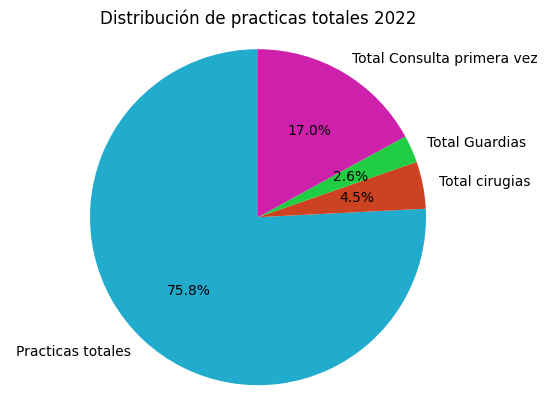

In [14]:
etiquetas = ['Practicas totales', 'Total cirugias', 'Total Guardias', 'Total Consulta primera vez']
conteos = [conteo_por_practica1, conteo_practica_cx1, Conteo_guardias1, conteo_Primeravez1]  # Conteos

# Crear el gráfico de pastel
plt.pie(conteos, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#21abcd', '#cd4321', '#21cd43', '#cd21ab'])

# Ajustar el aspecto para que sea un círculo perfecto
plt.axis('equal')

# Agregar título
plt.title('Distribución de practicas totales 2022')

# Mostrar el gráfico
plt.show()

#**Representación de filtros dentro de prácticas totales graficados según período**

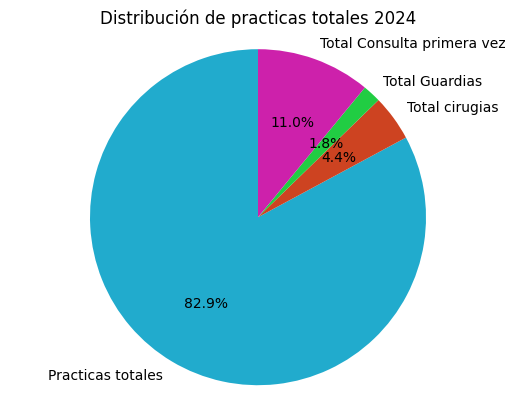

In [15]:
etiquetas = ['Practicas totales', 'Total cirugias', 'Total Guardias', 'Total Consulta primera vez']
conteos = [conteo_por_practica2, conteo_practica_cx2, Conteo_guardias2, conteo_Primeravez2]  # Conteos

# Crear el gráfico de pastel
plt.pie(conteos, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#21abcd', '#cd4321', '#21cd43', '#cd21ab'])

# Ajustar el aspecto para que sea un círculo perfecto
plt.axis('equal')

# Agregar título
plt.title('Distribución de practicas totales 2024')

# Mostrar el gráfico
plt.show()

Conteo total de cada práctica realizada según período correspondiente

In [76]:
df = pd.DataFrame(data)
conteo_por_practica_groupby = df.groupby('PRACTICA').size()

df2 = pd.DataFrame(data2)
conteo_por_practica_groupby2 = df2.groupby('PRACTICA').size()

print(f"Conteo por práctica agrupado según período 01-09-2022 / 20-03-2023: {conteo_por_practica_groupby}")
print(f"Conteo por práctica agrupado según período 01-01-2024 / 30-06-2024: {conteo_por_practica_groupby2}")


Conteo por práctica agrupado según período 01-09-2022 / 20-03-2023: PRACTICA
429001 - PRIMERA CONSULTA OFTALMOLOGICA EN CONSULTORIO (INCLUYE: ANAMNESIS. EXAMEN DE RUTINA DE OJOS, PARPADOS Y CONJUNTIVA. AGUDEZA VISUAL CON O SIN CORRECCION. AUTORREFLECTOMETRIA. TRATAMIENTO MEDICO)                         1767
429001 - VETERANO DE GUERRA - PRIMERA CONSULTA OFTALMOLOGICA EN CONSULTORIO (INCLUYE: ANAMNESIS. EXAMEN DE RUTINA DE OJOS, PARPADOS Y CONJUNTIVA. AGUDEZA VISUAL CON O SIN CORRECCION. AUTORREFLECTOMETRIA. TRATAMIENTO MEDICO)       4
429002 - CONSULTA DE SEGUIMIENTO OFTALMOLOGICO EN CONSULTORIO (INCLUYE: ANAMNESIS. EXAMEN DE RUTINA DE OJOS, PARPADOS Y CONJUNTIVA. AGUDEZA VISUAL CON O SIN CORRECCION. AUTORREFLECTOMETRIA. TRATAMIENTO MEDICO)                  2987
429003 - CONSULTA DE GUARDIA O URGENCIA (INCLUYE: ANAMNESIS. EXAMEN DE RUTINA DE OJOS, PARPADOS Y CONJUNTIVA. AGUDEZA VISUAL CON O SIN CORRECCION. AUTORREFLECTOMETRIA. TRATAMIENTO MEDICO)                                        

Cantidad de visitas por afiliado

In [35]:
conteo = combined_data['APELLIDO_NOMBRE'].value_counts()
print(conteo)

APELLIDO_NOMBRE
VARGAS BETANCURT FELIX             35
MINERVINI IRMA MABEL               28
COROMINAS NORMA AZUCENA            24
GEREZ JOSÉ REYNALDO                24
CANNAS MARIA ELENA                 24
                                   ..
CRESPO ELSA NELIDA                  1
POLITO SILVIA SUSANA                1
ACUŃA MARTA SUSANA                  1
GARCIA CELSA VIRGINIA               1
GAVILAN BENITEZ TERESA DE JESUS     1
Name: count, Length: 5356, dtype: int64


Cantidad de visitas por afiliado según prácticas

In [38]:
# Elegir el valor duplicado que quieres detallar
valor_a_buscar = "GEREZ JOSÉ REYNALDO"  # Cambia esto por el valor que deseas analizar

# Filtrar las filas que contienen el valor duplicado
detalle_duplicados = combined_data[combined_data['APELLIDO_NOMBRE'] == valor_a_buscar]

# Seleccionar solo las columnas deseadas
detalle_duplicados = detalle_duplicados[['APELLIDO_NOMBRE', 'FECHA_TURNO', 'PRACTICA']]

# Mostrar las filas relacionadas
print(detalle_duplicados.to_string(index=False))

    APELLIDO_NOMBRE FECHA_TURNO                                                                                                                                                                                                          PRACTICA
GEREZ JOSÉ REYNALDO  2024-04-03 429002 - CONSULTA DE SEGUIMIENTO OFTALMOLOGICO EN CONSULTORIO (INCLUYE: ANAMNESIS. EXAMEN DE RUTINA DE OJOS, PARPADOS Y CONJUNTIVA. AGUDEZA VISUAL CON O SIN CORRECCION. AUTORREFLECTOMETRIA. TRATAMIENTO MEDICO)
GEREZ JOSÉ REYNALDO  2024-05-03                                                                                                            505014 - ECOGRAFIA Y/O ECOMETRIA OFTALMOLOGICA -UNILATERAL- CON EQUIPO ACORDE (TIPO IOL, ALADIN, ETC.)
GEREZ JOSÉ REYNALDO  2024-03-05                                                                                                            505012 - ANALIZADOR DEL ENDOTELIO CORNEAL (ADEC) POR CAPTURA DE IMAGENES PARA MICROSCOPIA.-UNILATERAL-
GEREZ JOSÉ REYNALDO  2024-03-05 